<a href="https://colab.research.google.com/github/VillaCamacho-Miguel/Redes-Neuronales/blob/main/MLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

# Cargar los datos de entrenamiento y validación
(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()

# Normalizar los datos de las imágenes
x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255

# Convertir las etiquetas a vectores one-hot
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)

# Cargar los datos de prueba
(x_test, y_test) = keras.datasets.cifar10.load_data()[1]
x_test = x_test.astype("float32") / 255
y_test = keras.utils.to_categorical(y_test, 10)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluar el modelo con datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy:', test_acc)

KeyboardInterrupt: ignored

In [ ]:
cifar_10 = keras.datasets.cifar10

(train_imgs, train_labels), (test_imgs, test_labels) = cifar_10.load_data()

train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

model = keras.Sequential([
keras.layers.Flatten(input_shape=(32, 32, 3)),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(50, activation='softmax')
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_imgs, train_labels, batch_size=256, epochs=50)

test_loss, test_acc  = model.evaluate(test_imgs, test_labels,  verbose= 2)
print('\nExactitud en el conjunto de prueba: ', test_acc)

Epoch 1/50
196/196 [==============================] - 4s 6ms/step - loss: 2.1302 - accuracy: 0.2339
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8621 - accuracy: 0.3269
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7903 - accuracy: 0.3538
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7392 - accuracy: 0.3750
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7067 - accuracy: 0.3854
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6879 - accuracy: 0.3941
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6705 - accuracy: 0.3976
Epoch 8/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6363 - accuracy: 0.4129
Epoch 9/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6174 - accuracy: 0.4177
Epoch 10/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6082 - accuracy: 0.4223

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Cargar la imagen
img = Image.open('download.jpg') # Cambiar 'ruta_de_la_imagen.jpg' por la ruta de la imagen que se desea clasificar
img = img.resize((32, 32)) # Cambiar (32, 32) por las dimensiones de entrada del modelo

# Convertir la imagen a un array de numpy
img = np.array(img)
img = img.reshape(1, 32, 32, 3)

# Realizar la predicción
predictions = model.predict(img)

# Obtener el nombre de la clase correspondiente
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = class_names[np.argmax(predictions)]

print('La imagen representa:', predicted_class)

1/1 [==============================] - 0s 37ms/step
La imagen representa: dog


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset de moda de Keras
fashion_mnist = keras.datasets.fashion_mnist
print("dataset ", fashion_mnist)
# Dividir el dataset en datos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("entrenamiento", train_images)
# Definir las etiquetas para las clases de moda
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Tenis', 'Bolso', 'Botines']

# Preprocesar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])


# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nExactitud en el conjunto de prueba:', test_acc)

# Hacer predicciones con el modelo
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Mostrar algunas imágenes junto con las predicciones del modelo
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i]])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[i])
    plt.ylim([0, 1])
    plt.xticks(range(10), class_names, rotation=90)
plt.show()


dataset  <module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.9/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>
entrenamiento [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Epoch 1/10
 785/1875 [===========>..............

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
# Definir las etiquetas para las clases de moda
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalias', 'Camisa', 'Tenis', 'Bolso', 'Botines']

# Cargar la imagen
img = keras.preprocessing.image.load_img("sss.jpg", target_size=(28, 28), color_mode="grayscale")

# Convertir la imagen a un array de NumPy
img_array = keras.preprocessing.image.img_to_array(img)

# Preprocesar la imagen
img_array = img_array.astype("float32") / 255.0
img_array = img_array.reshape(-1, 28, 28)


# Realizar la predicción
predictions = model.predict(img_array)


print(predictions)
# Obtener la clase con mayor probabilidad
predicted_class = np.argmin(predictions[0])

# Mostrar la imagen con la predicción del modelo
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Predicción: " + class_names[predicted_class])
plt.axis('off')
plt.show()




InvalidArgumentError: ignored

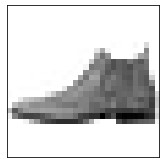

1/1 [==============================] - 0s 194ms/step
[[-6.830169677734375, -11.028243064880371, -8.014180183410645, -11.203685760498047, -10.730961799621582, 3.274311065673828, -6.060873031616211, 2.202533721923828, -8.539509773254395, 7.055273056030273]]


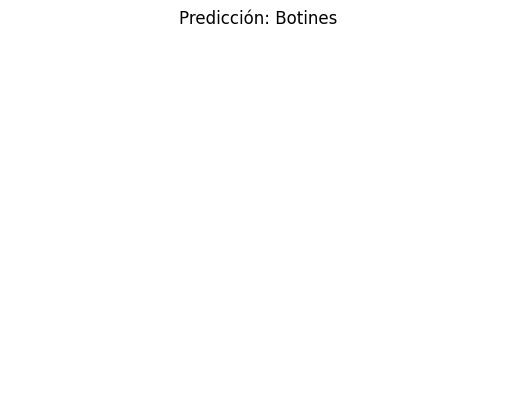

In [ ]:
import PIL.ImageOps
from PIL import Image
import cv2
import numpy as np
#Custom Image Prediction
size = 28,28
image1="sss.jpg"
im = Image.open(image1).convert("L")
display(im)

im = PIL.ImageOps.invert(im)
im_resized = im.resize(size)
im_resized.save("down.png","PNG")
img = cv2.imread("down.png",0)  
img = img / 255 
img = np.reshape(img,(1, 28, 28, 1)) 
lista = model.predict(img)
lista = lista.tolist()

print(lista)
# Obtener la clase con mayor probabilidad
predicted_class = np.argmax(lista[0])

# Mostrar la imagen con la predicción del modelo¿
plt.title("Predicción: " + class_names[predicted_class])
plt.axis('off')
plt.show()


# Clasificacion de sentimientos
Lo siguiente es un ejemplo de clasificación de texto utilizando la base de datos IMDb para la detección de sentimientos. Aquí se utiliza la biblioteca Keras para construir una red neuronal que clasifique críticas de películas en positivas o negativas.



In [ ]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

results = model.evaluate(x_test, y_test)
print(results)


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
49/49 [==============================] - 6s 107ms/step - loss: 0.4644 - accuracy: 0.8104 - val_loss: 0.3426 - val_accuracy: 0.8783
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2728 - accuracy: 0.9041 - val_loss: 0.2865 - val_accuracy: 0.8897
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2121 - accuracy: 0.9243 - val_loss: 0.2980 - val_accuracy: 0.8790
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1800 - accuracy: 0.9375 - val_loss: 0.2852 - val_accuracy: 0.8863
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1564 - accuracy: 0.9450 - val_loss: 0.3006 - val_accuracy: 0.8828
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1384 - accuracy: 0.9536 - val_loss: 0.3165 - val_accuracy: 0.8789
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1244 - accura

In [ ]:
word_index = imdb.get_word_index()

def encode_review(review):
    words = review.lower().split()
    encoded = []
    for word in words:
        if word in word_index and word_index[word] < 10000:
            encoded.append(word_index[word] + 3)
    return encoded

def predict_sentiment(review):
    encoded_review = encode_review(review)
    vectorized_review = vectorize_sequences([encoded_review])
    return model.predict(vectorized_review)[0][0]

print(predict_sentiment('This is a really good movie. i like it at all'))
print(predict_sentiment('This movie was terrible. I did not like it at all.'))

text = 'This is a really good movie. i like it at all'
val = predict_sentiment(text);

if val > 0.6:
  print('Positivo')
elif val < 0.4:
  print('Negativo')
else:
  print('Neutral')

1/1 [==============================] - 0s 29ms/step
0.6958495
1/1 [==============================] - 0s 30ms/step
0.17520554
1/1 [==============================] - 0s 27ms/step
Positivo
